## 🧮 Day 3 - Segment Customers Using RFM Analysis (Recency, Frequency, Monetary)

RFM helps identify valuable customers based on:

- Recency: How recently a customer made a purchase

- Frequency: How often they purchase

- Monetary: How much they spend

### 📦 Step 1: Load Cleaned Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned Superstore dataset
df = pd.read_csv('../data/superstore_cleaned.csv')
df.head()

,row_id,order_id,order_date,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,...,customer_name,province,region,customer_segment,product_category,product_sub-category,product_name,product_container,product_base_margin,ship_date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10/1/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2,50,293,10/1/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
3,80,483,7/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


### 📅 Step 2: Convert **order_date** to datetime

In [2]:
# Convert order_date to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

### 🧮 Step 3: Create RFM Table

In [3]:
# Set the reference date (usually one day after the last order)
snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)

# Group by customer and calculate RFM metrics
rfm = df.groupby('customer_name').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'sales': 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['customer_name', 'recency', 'frequency', 'monetary']
rfm.head()

,customer_name,recency,frequency,monetary
0,Aaron Bergman,583,5,11630.5900
1,Aaron Hawkins,368,9,27690.7255
2,Aaron Smayling,347,8,8835.3235
3,Adam Bellavance,90,8,11577.5800
4,Adam Hart,20,18,26114.2645


### 🔢 Step 4: Assign RFM Scores (1–4)

In [4]:
# Assign scores using quantiles
rfm['R_score'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm.head()

,customer_name,recency,frequency,monetary,R_score,F_score,M_score,RFM_score
0,Aaron Bergman,583,5,11630.5900,1,2,2,122
1,Aaron Hawkins,368,9,27690.7255,1,3,4,134
2,Aaron Smayling,347,8,8835.3235,1,3,2,132
3,Adam Bellavance,90,8,11577.5800,3,3,2,332
4,Adam Hart,20,18,26114.2645,4,4,4,444


### 🎯 Step 5: Define Customer Segments (Optional)

In [5]:
def segment_customer(score):
    if score >= '444':
        return 'Top Customer'
    elif score >= '344':
        return 'Loyal'
    elif score >= '244':
        return 'Potential'
    else:
        return 'At Risk'

rfm['segment'] = rfm['RFM_score'].apply(segment_customer)
rfm['segment'].value_counts()

segment
At Risk         371
Potential       192
Loyal           172
Top Customer     60
Name: count, dtype: int64

### 📈 Step 6: Visualize Segment Counts

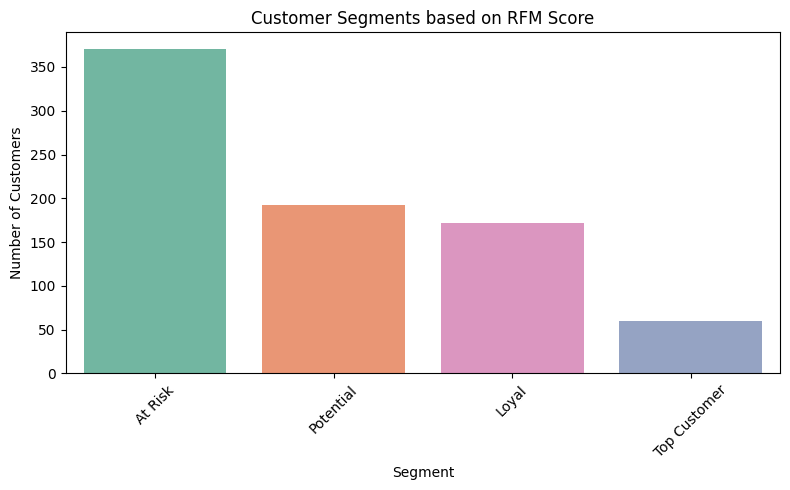

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x='segment', hue='segment', order=rfm['segment'].value_counts().index, palette='Set2', legend=False)
plt.title('Customer Segments based on RFM Score')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ✅ Summary of Day 3
- Calculated Recency, Frequency, and Monetary metrics
- Created RFM scores for all customers
- Labeled and visualized customer segments

🚀 Ready to move to Day 4: Product-Level Analysis & Profitability Trends!